In [38]:
import pandas as pd
import numpy as np
import sys
import re
import csv

In [39]:
traindata = pd.read_csv("aps_failure_training_set.csv", header = 14)
testdata = pd.read_csv("aps_failure_test_set.csv", header =14)
traindata = traindata.replace("na", np.nan)
testdata= testdata.replace("na", np.nan)
print(len(traindata))
print(len(testdata))
X_train = traindata[traindata.columns[1:]]
y_train = traindata[traindata.columns[0]]
X_test = testdata[testdata.columns[1:]]
y_test= testdata[testdata.columns[0]]

60000
16000


In [40]:
from sklearn.preprocessing import Imputer
#deal with missing values using mean substitution
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X_train)
X_train = pd.DataFrame(imp.transform(X_train))
imp.fit(X_test)
X_test = pd.DataFrame(imp.transform(X_test))

In [4]:
#2b calcalate CV
varlst = []
for a in X_train.columns:
    varlst.append(X_train[a].std()/X_train[a].mean())
print(varlst)
print(len(varlst))

[2.450937577943998, 2.3283999870318435, 2.169766523276966, 183.84762036900082, 23.190936665578853, 18.658921096017636, 91.87856462936738, 34.854950077721575, 17.369143404889634, 8.550049026704684, 5.401478695421808, 2.9270920824257813, 2.3449270703375973, 2.8334840909357935, 6.1545830785515525, 32.98435104133622, 2.3001872486143227, 18.01268174446153, 43.80182238271878, 74.5266879586007, 9.074370822656968, 9.058671606113235, 2.2387967743803063, 2.260149116812668, 3.059164306638844, 2.839611693365452, 10.837049702204823, 86.41690384051536, 23.4594247908152, 68.1605540126918, 5.778784910088061, 3.87756833864513, 37.009562327062504, 52.23385176360165, 38.809580401918666, 28.413541533699558, 33.37471600468463, 12.384140755927538, 3.0230876409551373, 3.284242057456218, 3.775647501365842, 83.78606300858695, 9.328344486184422, 7.646419521779571, 13.141692934269287, 7.445975842745191, 2.817140133262502, 3.008074496977547, 8.780911858826425, 16.0475831066938, 22.425769593584352, 76.967978063588

In [4]:
#polt correlation matrix for all predictors' columns 2b
import matplotlib.pyplot as plt
import matplotlib as pt
plt.figure(figsize=(25,25))
plt.imshow(X_train.corr())

plt.colorbar()
plt.savefig("cormatrix2.png")
plt.show()

In [11]:
tmp=sorted(varlst, reverse= True)
indlst =[]
for val in tmp[0:13]:
    indlst.append(varlst.index(val))
print(indlst)

[122, 91, 109, 3, 136, 138, 6, 27, 41, 51, 19, 29, 93]


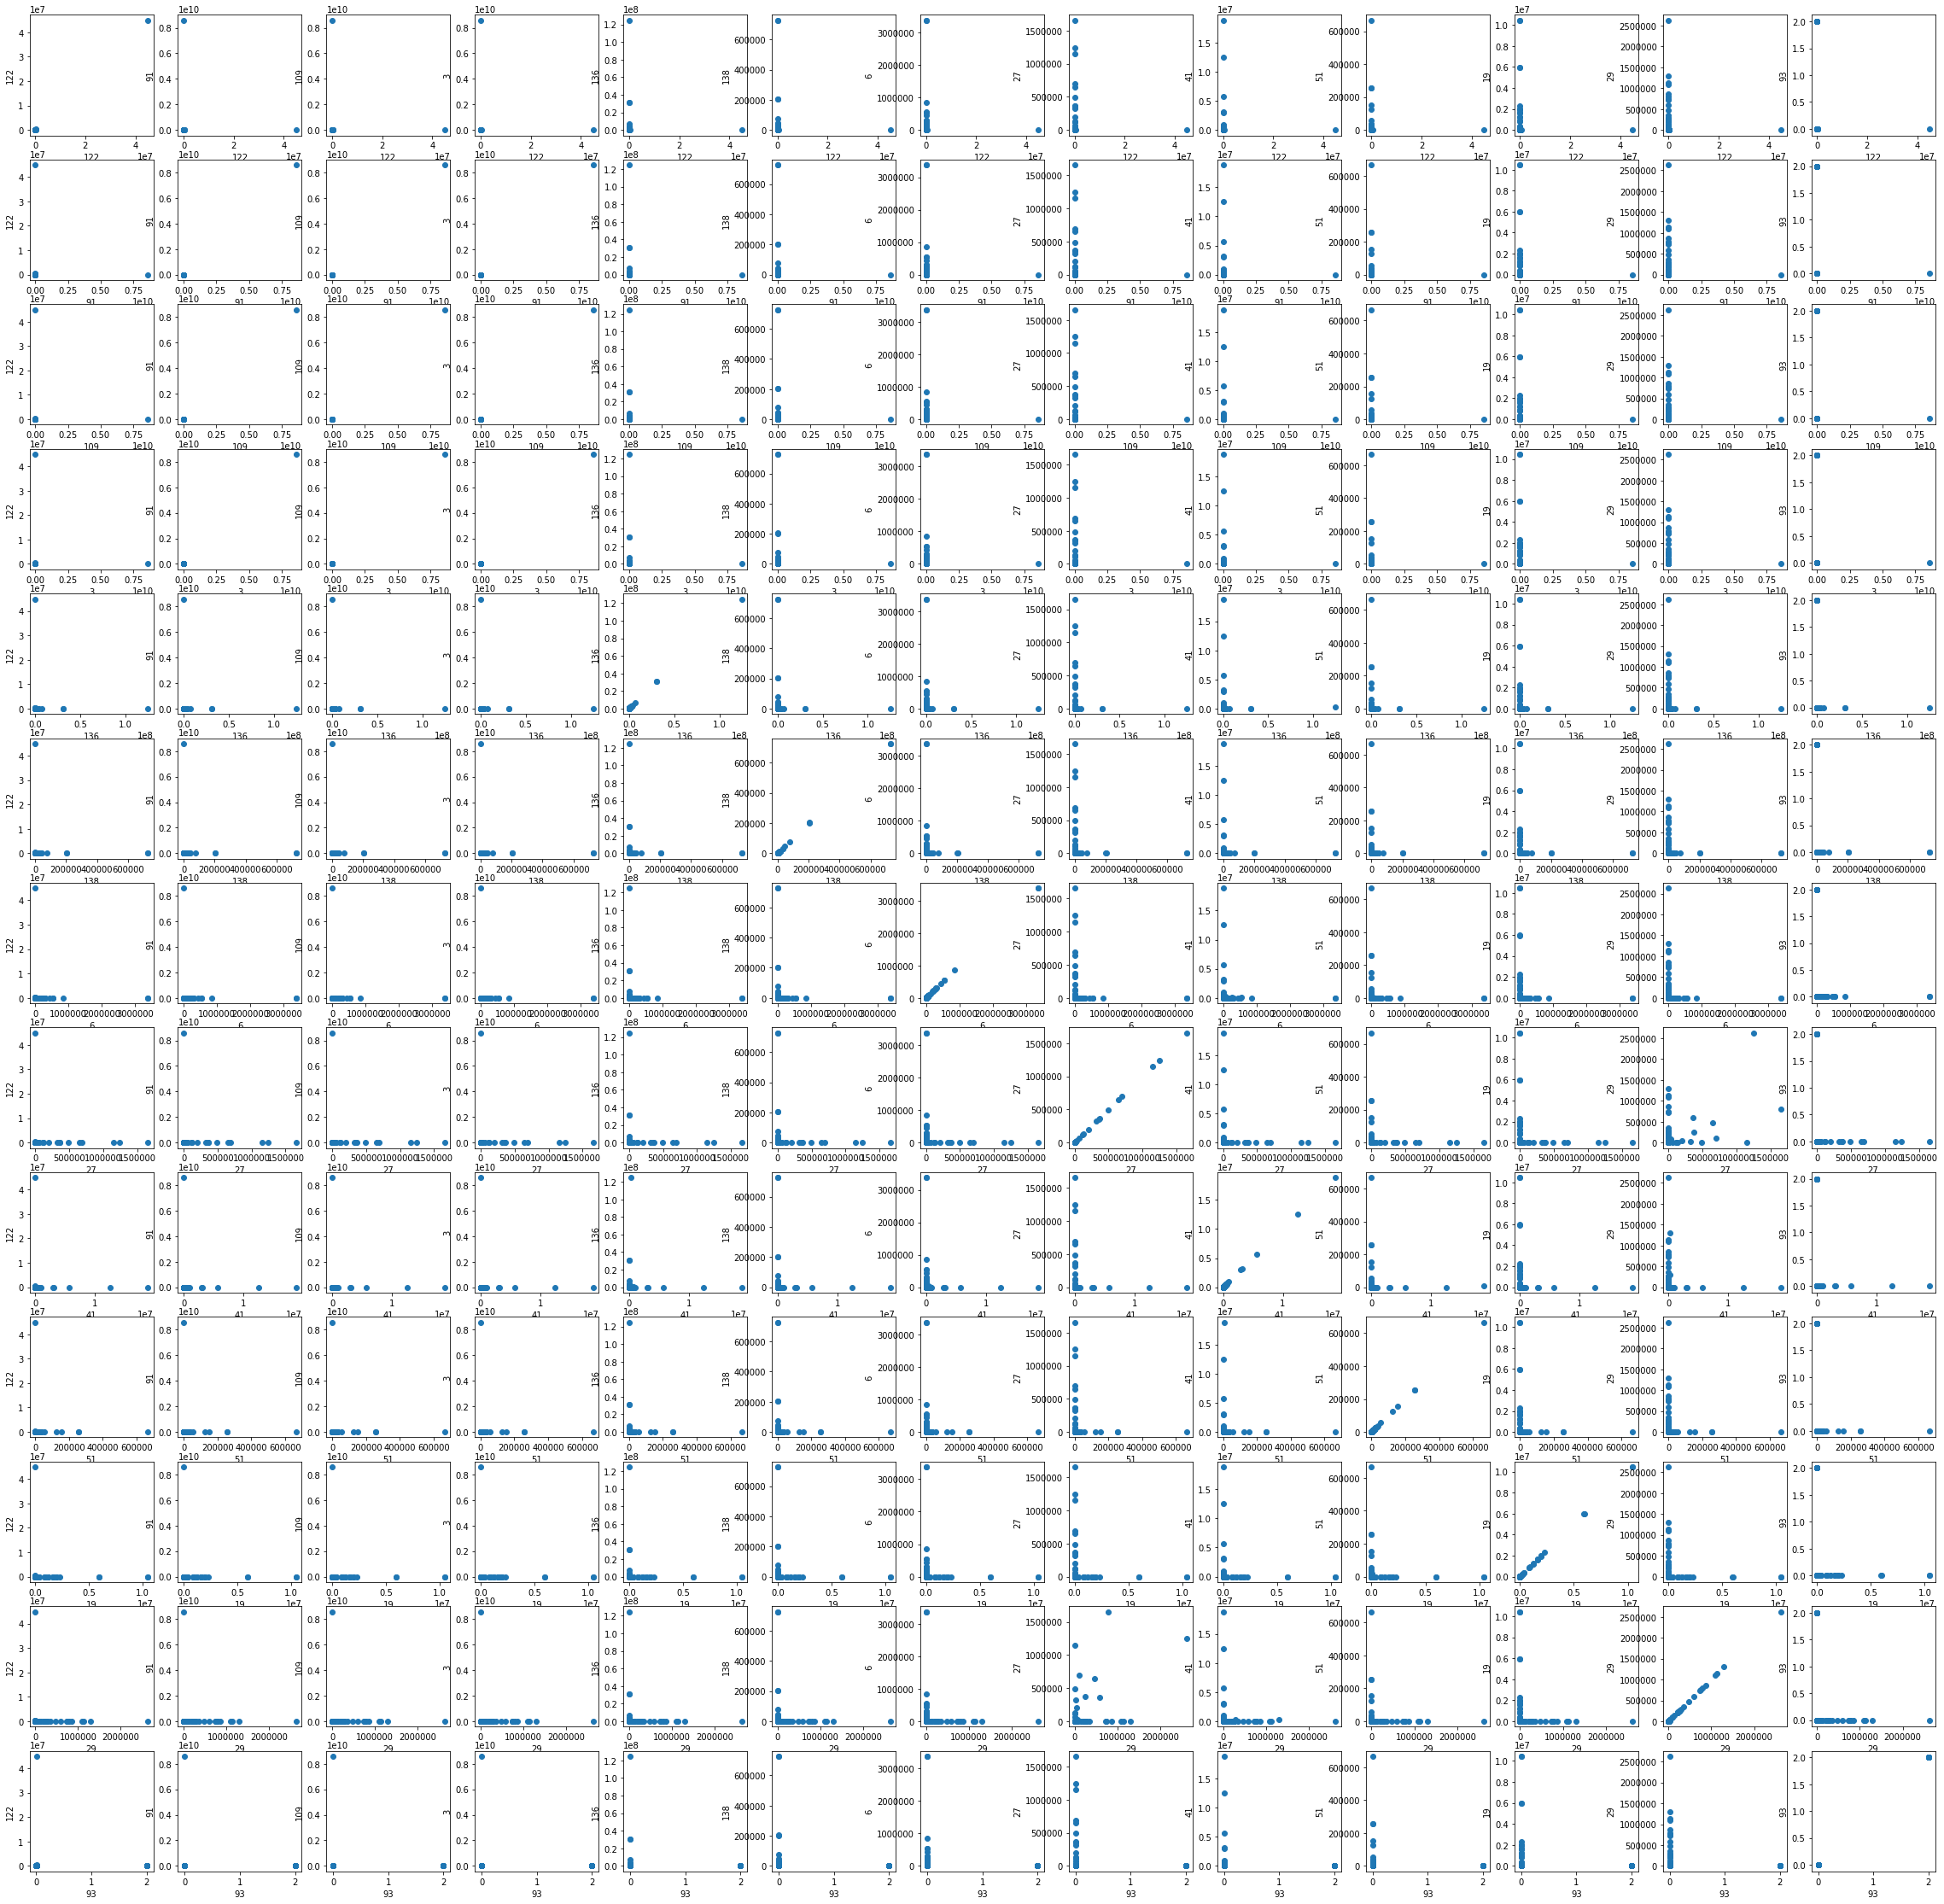

In [12]:
#scatter plots 2b
plt.figure(figsize =(40,40))
cnt = 0
for val1 in indlst:
    for val2 in indlst:
        plt.subplot(13,13,cnt+1)
        plt.scatter(X_train[X_train.columns[val1]], X_train[X_train.columns[val2]])
        plt.xlabel(val1)
        plt.ylabel(val2)
        cnt+=1
plt.savefig("scatters2.png")
plt.show()

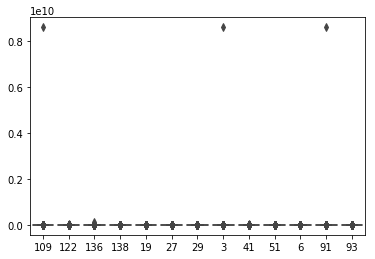

In [13]:
#boxplot 2b
import seaborn as sea
d=  {}
for v in indlst:
#     plt.boxplot(pdf[pdf.columns[v]])
    d[str(v)] = X_train[X_train.columns[v]].tolist()
ptstruct = pd.DataFrame(d)
sea.boxplot(data=ptstruct)
plt.savefig("box2.png")
plt.show()

In [5]:
neg=y_train.tolist().count("neg")
pos= y_train.tolist().count("pos")

print("number of neg:", str(neg))
print("number of pos:", str(pos))

neg=y_test.tolist().count("neg")
pos= y_test.tolist().count("pos")

print("number of neg:", str(neg))
print("number of pos:", str(pos))

number of neg: 59000
number of pos: 1000
number of neg: 15625
number of pos: 375


In [6]:
y_train = y_train.replace("pos", 1)
y_train = y_train.replace("neg", 0)

C:\Users\hyper\Anaconda3\envs\python3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hyper\Anaconda3\envs\python3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


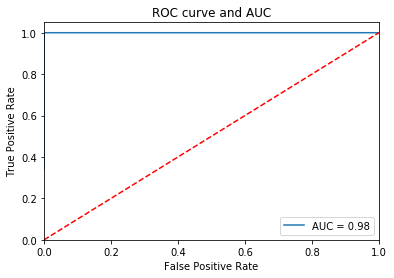

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     59000
          1       1.00      0.97      0.98      1000

avg / total       1.00      1.00      1.00     60000

[[58998     2]
 [   31   969]]


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(oob_score=True)
rfc = rfc.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_train, rfc.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, rfc.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_train_RF')
plt.show()
print(classification_report(y_train,rfc.predict(X_train)))
newmatrix = confusion_matrix(y_train,rfc.predict(X_train))
print(newmatrix)


In [7]:
y_test = y_test.replace("pos", 1)
y_test = y_test.replace("neg", 0)

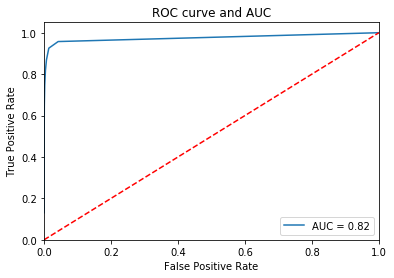

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     15625
          1       0.95      0.65      0.77       375

avg / total       0.99      0.99      0.99     16000

[[15613    12]
 [  131   244]]


In [18]:
# rfc = RandomForestClassifier()
# rfc = rfc.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_test_RF')
plt.show()
print(classification_report(y_test,rfc.predict(X_test)))
newmatrix = confusion_matrix(y_test,rfc.predict(X_test))
print(newmatrix)


In [19]:
oob_error = 1 - rfc.oob_score_
print(oob_error)

0.00928333333333


C:\Users\hyper\Anaconda3\envs\python3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hyper\Anaconda3\envs\python3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


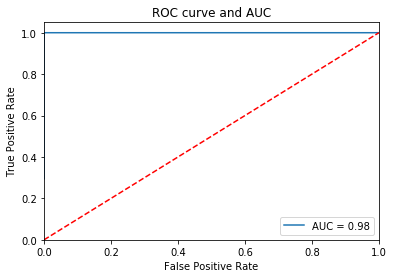

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     59000
          1       1.00      0.96      0.98      1000

avg / total       1.00      1.00      1.00     60000

[[59000     0]
 [   38   962]]


In [10]:
rfc = RandomForestClassifier(oob_score=True, class_weight =  {0: 1, 1: 10})
rfc = rfc.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_train, rfc.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, rfc.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_train_RF_balanced')
plt.show()
print(classification_report(y_train,rfc.predict(X_train)))
newmatrix = confusion_matrix(y_train,rfc.predict(X_train))
print(newmatrix)

In [11]:
oob_error = 1 - rfc.oob_score_
print(oob_error)

0.00935


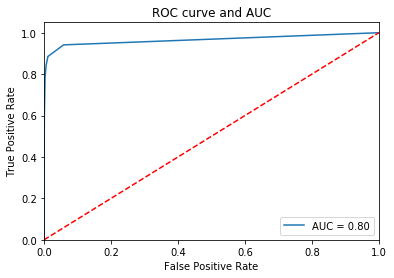

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     15625
          1       0.95      0.60      0.74       375

avg / total       0.99      0.99      0.99     16000

[[15612    13]
 [  149   226]]


In [25]:
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_test_RF_balanced')
plt.show()
print(classification_report(y_test,rfc.predict(X_test)))
newmatrix = confusion_matrix(y_test,rfc.predict(X_test))
print(newmatrix)

In [5]:
import weka.core.jvm as jvm

jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\hyper\\Anaconda3\\envs\\python3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\hyper\\Anaconda3\\envs\\python3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\hyper\\Anaconda3\\envs\\python3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\hyper\\Anaconda3\\envs\\python3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\hyper\\Anaconda3\\envs\\python3\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Signalling caller


In [6]:

#since the data set is really big(longtime training), I decide to use subsample (1/10 of previous data)to finish this 
from sklearn.utils import resample
tmptraindata = traindata[traindata.columns[1:]]
tmptestdata = testdata[testdata.columns[1:]]
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(tmptraindata)
newtraindata = pd.DataFrame(imp.transform(tmptraindata))
imp.fit(tmptestdata)
newtestdata = pd.DataFrame(imp.transform(tmptestdata))
newtraindata = pd.concat([newtraindata,traindata["class"]], axis = 1)
newtestdata = pd.concat([newtestdata,testdata["class"]], axis = 1)

newtraindata=newtraindata.replace("neg",0)
newtraindata = newtraindata.replace("pos",1)
newtestdata = newtestdata.replace("neg",0)
newtestdata = newtestdata.replace("pos",1)
newtraindata = resample(newtraindata, n_samples = 6000)
newtestdata = resample(newtestdata, n_samples = 1600)
# print(type(newtraindata))
# print(newtraindata[newtraindata.columns[170]].tolist().count(1))






In [10]:
import weka.core.converters as converters
from weka.filters import Filter
#generate newforms of data for jvm
trins = newtraindata.values.copy(order = "C")
teins = newtestdata.values.copy(order = "C")
#.T is also okay for it
train_ins = converters.ndarray_to_instances(trins, "train")
test_ins = converters.ndarray_to_instances(teins, "test")

train_ins.class_is_last()
test_ins.class_is_last()


# remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", "last"])
num =  Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "last"])
num.inputformat(train_ins)
nom_train_ins = num.filter(train_ins)
num.inputformat(test_ins)
nom_test_ins = num.filter(test_ins)

In [30]:
from weka.classifiers import Classifier
import weka.plot.classifiers as pc
from weka.classifiers import Evaluation
from weka.core.classes import Random
lmt = Classifier(classname = "weka.classifiers.trees.LMT")
# lmt.build_classifier(nom_train_ins)



99.01666666666667

Correctly Classified Instances        5941               99.0167 %
Incorrectly Classified Instances        59                0.9833 %
Kappa statistic                          0.6761
Mean absolute error                      0.0126
Root mean squared error                  0.0852
Relative absolute error                 37.4139 %
Root relative squared error             65.935  %
Total Number of Instances             6000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.382    0.993      0.997    0.995      0.680    0.967     0.998     0
                 0.618    0.003    0.759      0.618    0.681      0.680    0.967     0.740     1
Weighted Avg.    0.990    0.376    0.989      0.990    0.990      0.680    0.967     0.994     

=== Confusion Matrix ===

    a    b   <-- classified as
 5878   20 |    a = 0
   39   63 |    b = 1



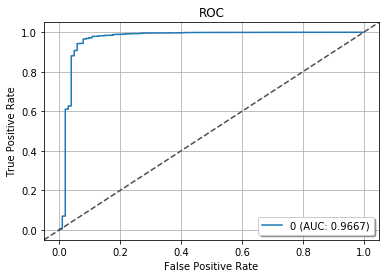

In [101]:
evl = Evaluation(nom_train_ins)
#5fold validation
evl.crossvalidate_model(lmt, nom_train_ins, 5, Random(1))
print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())
print(evl.matrix())


pc.plot_roc(evl)

98.66666666666667

Correctly Classified Instances        5920               98.6667 %
Incorrectly Classified Instances        80                1.3333 %
Kappa statistic                          0.6229
Mean absolute error                      0.0167
Root mean squared error                  0.1013
Relative absolute error                 43.8741 %
Root relative squared error             73.5445 %
Total Number of Instances             6000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.995    0.414    0.992      0.995    0.993      0.625    0.953     0.997     0
                 0.586    0.005    0.680      0.586    0.630      0.625    0.953     0.651     1
Weighted Avg.    0.987    0.406    0.986      0.987    0.986      0.625    0.953     0.991     

=== Confusion Matrix ===

    a    b   <-- classified as
 5852   32 |    a = 0
   48   68 |    b = 1



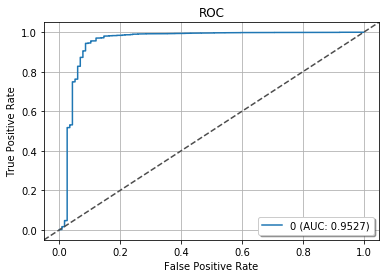

In [10]:
evl = Evaluation(nom_train_ins)
#10fold validation
evl.crossvalidate_model(lmt, nom_train_ins, 10, Random(1))
print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())
print(evl.matrix())


pc.plot_roc(evl)

98.5625

Correctly Classified Instances        1577               98.5625 %
Incorrectly Classified Instances        23                1.4375 %
Kappa statistic                          0.6689
Mean absolute error                      0.0172
Root mean squared error                  0.1055
Relative absolute error                 34.09   %
Root relative squared error             66.7603 %
Total Number of Instances             1600     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.996    0.415    0.989      0.996    0.993      0.677    0.991     1.000     0
                 0.585    0.004    0.800      0.585    0.676      0.677    0.991     0.808     1
Weighted Avg.    0.986    0.404    0.984      0.986    0.985      0.677    0.991     0.995     

=== Confusion Matrix ===

    a    b   <-- classified as
 1553    6 |    a = 0
   17   24 |    b = 1



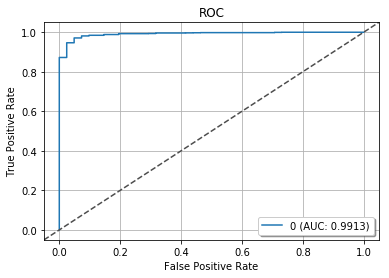

In [13]:
#
lmt.build_classifier(nom_train_ins)
evl = Evaluation(nom_test_ins)
evl.test_model(lmt, nom_test_ins)
print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())
print(evl.matrix())




pc.plot_roc(evl)

In [49]:
from imblearn.over_sampling import SMOTE
tmptraindata = traindata[traindata.columns[1:]]
tmptestdata = testdata[testdata.columns[1:]]
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(tmptraindata)
newtraindata = pd.DataFrame(imp.transform(tmptraindata))
imp.fit(tmptestdata)
newtestdata = pd.DataFrame(imp.transform(tmptestdata))
newtraindata = pd.concat([newtraindata,traindata["class"]], axis = 1)
newtestdata = pd.concat([newtestdata,testdata["class"]], axis = 1)

# newtraindata=newtraindata.replace("neg",0)
# newtraindata = newtraindata.replace("pos",1)
# newtestdata = newtestdata.replace("neg",0)
# newtestdata = newtestdata.replace("pos",1)
newtraindata = resample(newtraindata, n_samples = 1200)
newtestdata = resample(newtestdata, n_samples = 320)


In [51]:
t=newtestdata[newtestdata.columns[-1]].tolist()
t.count("neg")

315

In [54]:
sm = SMOTE(random_state=42, k_neighbors=2)

In [61]:
Xtr = newtraindata[newtraindata.columns[0:-1]]
Ytr = newtraindata[newtraindata.columns[-1]]
Xte = newtestdata[newtestdata.columns[0:-1]]
Yte = newtestdata[newtestdata.columns[-1]]
Xtrsmote, Ytrsmote = sm.fit_sample(Xtr.values, Ytr.values) 
Xtesmote, Ytesmote = sm.fit_sample(Xte.values, Yte.values)
Xtrsmote = pd.DataFrame(Xtrsmote)
Ytrsmote = pd.DataFrame(Ytrsmote)
Xtesmote = pd.DataFrame(Xtesmote)
Ytesmote = pd.DataFrame(Ytesmote)
trsmote = pd.concat([Xtrsmote, Ytrsmote], axis = 1)
tesmote = pd.concat([Xtesmote, Ytesmote], axis =1)
trsmote=trsmote.replace("neg",0)
trsmote = trsmote.replace("pos",1)
tesmote = tesmote.replace("neg",0)
tesmote = tesmote.replace("pos",1)

In [65]:
import weka.core.converters as converters
from weka.filters import Filter
trins = trsmote.values.copy(order = "C")
teins = tesmote.values.copy(order = "C")
#.T is also okay for it
train_ins = converters.ndarray_to_instances(trins, "train")
test_ins = converters.ndarray_to_instances(teins, "test")

train_ins.class_is_last()
test_ins.class_is_last()


# remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", "last"])
num =  Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "last"])
num.inputformat(train_ins)
nom_train_ins = num.filter(train_ins)
num.inputformat(test_ins)
nom_test_ins = num.filter(test_ins)

99.23664122137404

Correctly Classified Instances        2340               99.2366 %
Incorrectly Classified Instances        18                0.7634 %
Kappa statistic                          0.9847
Mean absolute error                      0.0136
Root mean squared error                  0.0774
Relative absolute error                  2.7107 %
Root relative squared error             15.4747 %
Total Number of Instances             2358     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.985    0.000    1.000      0.985    0.992      0.985    0.997     0.998     0
                 1.000    0.015    0.985      1.000    0.992      0.985    0.997     0.991     1
Weighted Avg.    0.992    0.008    0.992      0.992    0.992      0.985    0.997     0.995     

=== Confusion Matrix ===

    a    b   <-- classified as
 1161   18 |    a = 0
    0 1179 |    b = 1



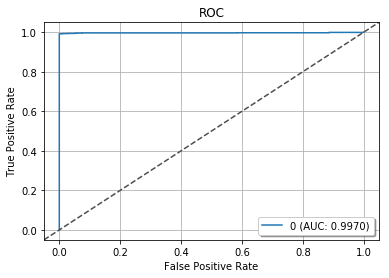

In [66]:
evl = Evaluation(nom_train_ins)
#5fold validation
evl.crossvalidate_model(lmt, nom_train_ins, 5, Random(1))
print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())
print(evl.matrix())


pc.plot_roc(evl)

99.4910941475827

Correctly Classified Instances        2346               99.4911 %
Incorrectly Classified Instances        12                0.5089 %
Kappa statistic                          0.9898
Mean absolute error                      0.0107
Root mean squared error                  0.0693
Relative absolute error                  2.1434 %
Root relative squared error             13.8505 %
Total Number of Instances             2358     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.990    0.000    1.000      0.990    0.995      0.990    0.998     0.999     0
                 1.000    0.010    0.990      1.000    0.995      0.990    0.998     0.996     1
Weighted Avg.    0.995    0.005    0.995      0.995    0.995      0.990    0.998     0.997     

=== Confusion Matrix ===

    a    b   <-- classified as
 1167   12 |    a = 0
    0 1179 |    b = 1



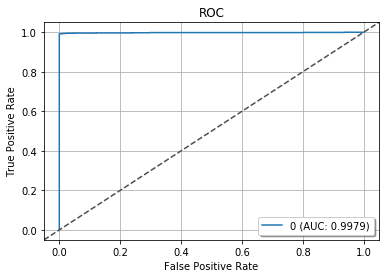

In [67]:
evl = Evaluation(nom_train_ins)
#10fold validation
evl.crossvalidate_model(lmt, nom_train_ins, 10, Random(1))
print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())
print(evl.matrix())


pc.plot_roc(evl)

99.36507936507937

Correctly Classified Instances         626               99.3651 %
Incorrectly Classified Instances         4                0.6349 %
Kappa statistic                          0.9873
Mean absolute error                      0.007 
Root mean squared error                  0.0697
Relative absolute error                  1.408  %
Root relative squared error             13.9424 %
Total Number of Instances              630     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.987    0.000    1.000      0.987    0.994      0.987    1.000     1.000     0
                 1.000    0.013    0.987      1.000    0.994      0.987    1.000     1.000     1
Weighted Avg.    0.994    0.006    0.994      0.994    0.994      0.987    1.000     1.000     

=== Confusion Matrix ===

   a   b   <-- classified as
 311   4 |   a = 0
   0 315 |   b = 1



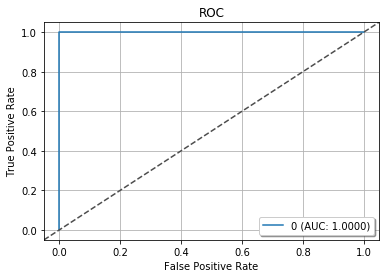

In [68]:
lmt.build_classifier(nom_train_ins)
evl = Evaluation(nom_test_ins)
evl.test_model(lmt, nom_test_ins)
print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())
print(evl.matrix())


pc.plot_roc(evl)